In [ ]:
# pip install spacy
# python -m spacy download en_core_web_sm

In [2]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [25]:
# Details of initializing an object nlp of Language class - https://spacy.io/usage/processing-pipelines
nlp = spacy.load("en_core_web_sm")

## Read in the sample data 
Kaggle source - https://www.kaggle.com/therohk/india-headlines-news-dataset

In [26]:
# Read in the sample data from the zip file 
news_df = pd.read_csv('C:/Users/ATiwari/Downloads/archive.zip')
# Format publish date and create a 'year' column 
news_df['publish_date_edt'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df['year'] = news_df['publish_date_edt'].dt.year

news_df.head(2)

,publish_date,headline_category,headline_text,publish_date_edt,year
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02,2001
1,20010102,unknown,Fissures in Hurriyat over Pak visit,2001-01-02,2001


In [27]:
# Identify nouns and verbs associated with headlines that mention 'farmers'
farmers_news = news_df.loc[news_df['headline_text'].str.match(r'farmer|farmers', case=False), 'headline_text'].tolist()
noun_f=[]
verb_f=[]
no_match=[]

for doc in nlp.pipe(farmers_news, batch_size=1000):
    for c in doc:
        if c.pos_=='NOUN':
            noun_f.append(c.text)
        elif c.pos_=="VERB":
            verb_f.append(c.text)
        else:
            no_match.append(c.text)

## Plot 

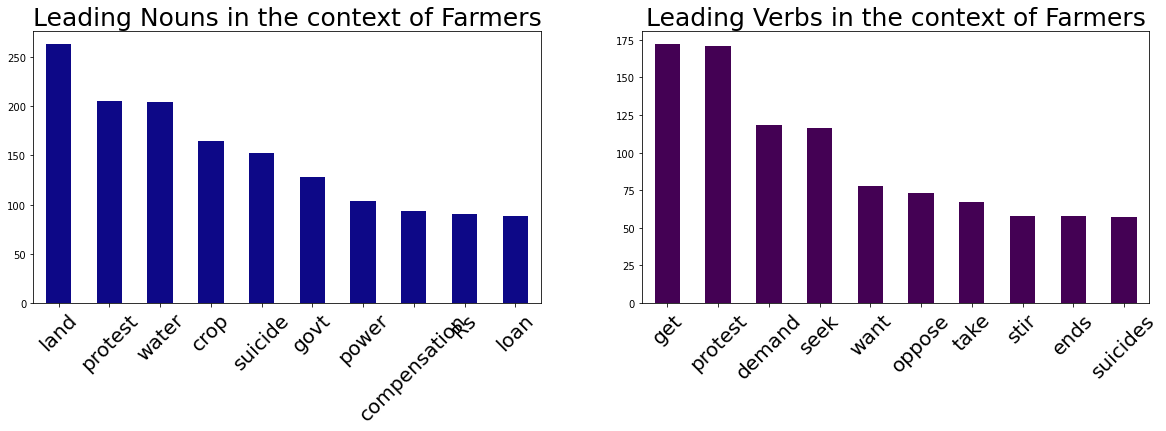

In [23]:
plt.subplot(1,2,1)
pd.Series([word for word in noun_f if word.lower() not in ['farmer', 'farmers']]).value_counts().head(10)\
    .plot(kind="bar",figsize=(20,5), colormap='plasma')
plt.title("Leading Nouns in the context of Farmers",fontsize=25)
plt.xticks(size=20,rotation=45)

plt.subplot(1,2,2)
pd.Series(verb_f).value_counts().head(10).plot(kind="bar", figsize=(20,5), colormap="viridis")
plt.title("Leading Verbs in the context of Farmers", fontsize=25)
plt.xticks(size=20,rotation=45)

plt.show()

As one would expect in the Indian context, most headlines associated with farmers mention protests, demands, compensation, water and sadly, suicides.  

More on this, coming soon!